In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense # fully connected
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn import datasets
import requests
from PIL import Image
import cv2

import random 
import pickle
import pandas as pd
%matplotlib inline

# Binary classification

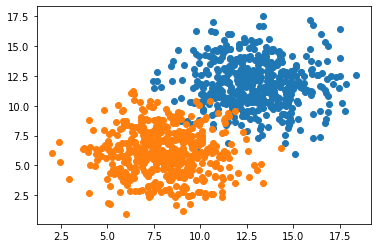

In [4]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [7]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(learning_rate=0.1)
model.compile(adam, loss='binary_crossentropy',metrics=['accuracy'])
h = model.fit(x=X,y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')


Epoch 1/500
20/20 [==============================] - 0s 2ms/step - loss: 2.6587 - accuracy: 0.4376
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1.0943 - accuracy: 0.5007
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7316
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8988
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.9057
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.9073
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9261
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.9668
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9574
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9590
Epoch 11/

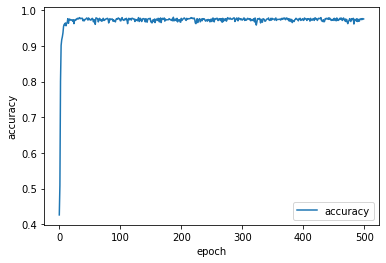

In [8]:
plt.plot(h.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['accuracy'])

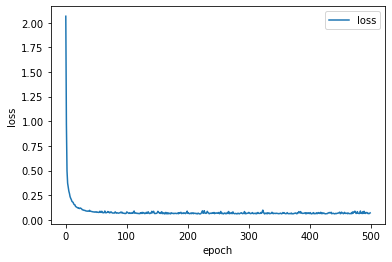

In [9]:
plt.plot(h.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['loss'])

In [10]:
def plot_decision_boundary(X,y,model):
  x_span = np.linspace(min(X[:,0])-0.3,max(X[:,0])+0.3)
  y_span = np.linspace(min(X[:,1])-0.3,max(X[:,1])+0.3)
  xx, yy  = np.meshgrid(x_span,y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred = model.predict(grid)
  z = pred.reshape(xx.shape)
  plt.contour(xx,yy,z)

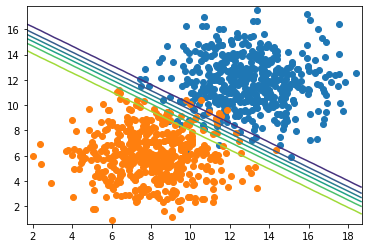

In [11]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

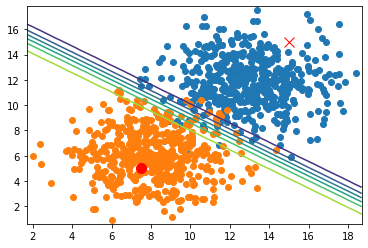

In [12]:
# Check for two test points
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5
new_point = np.array([[x,y]])
prediction = model.predict(new_point)
marker_ = "o" if prediction>0.5 else "x"
plt.plot([x],[y],marker=marker_,markersize = 10, color="red")

x = 15
y = 15
new_point = np.array([[x,y]])
prediction = model.predict(new_point)
marker_ = "o" if prediction>0.5 else "x"
plt.plot([x],[y],marker=marker_,markersize = 10, color="red")

# Deep Neural Network for 'wiggly' binary classification

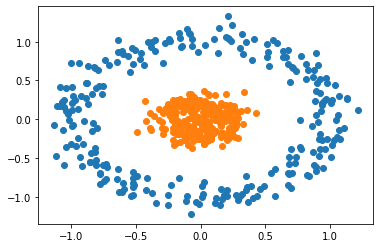

In [15]:
n_pts = 500
np.random.seed(0)
X,y = datasets.make_circles(n_samples=n_pts, random_state=123,
                            noise = 0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])

In [16]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
adam = Adam(learning_rate=0.01)
model.compile(adam, 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(X,y, verbose =1, batch_size=20, epochs = 200, 
          shuffle='true')

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5038
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.5167
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.3872
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5487
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.6096
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5726
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4002
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5406
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4960
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5926
Epoch 11/

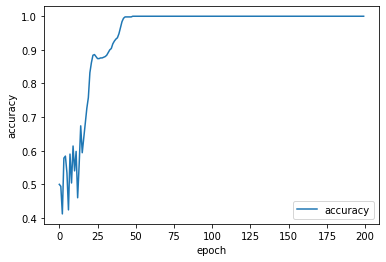

In [17]:
plt.plot(h.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['accuracy'])

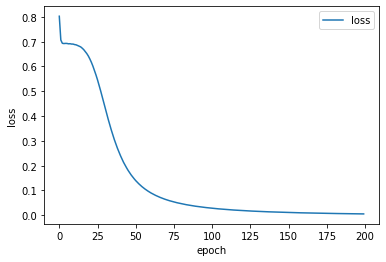

In [18]:
plt.plot(h.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['loss'])

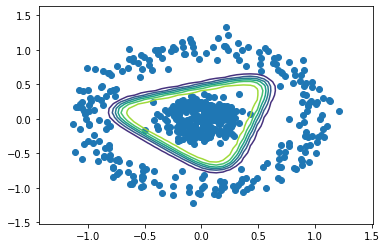

In [19]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

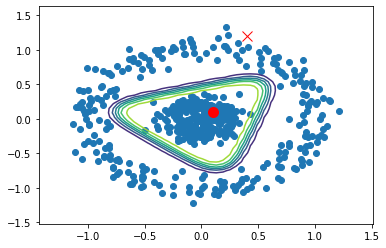

In [20]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 0.4
y = 1.2
new_point = np.array([[x,y]])
prediction = model.predict(new_point)
marker_ = "o" if prediction>0.5 else "x"
plt.plot([x],[y],marker=marker_,markersize = 10, color="red")

x = 0.1
y = 0.1
new_point = np.array([[x,y]])
prediction = model.predict(new_point)
marker_ = "o" if prediction>0.5 else "x"
plt.plot([x],[y],marker=marker_,markersize = 10, color="red")

# Multiclass Classification

In [21]:
n_pts = 500
centers =[[-1,1],[-1,-1],[1,-1]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, 
                          centers=centers, cluster_std=0.4)


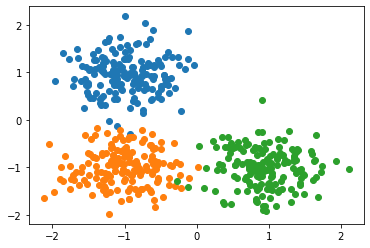

In [22]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [23]:
y_cat = to_categorical(y,num_classes=3)
y_cat.shape

(500, 3)

In [24]:
model = Sequential()
# 2D data: x1, x2 -> 2 input nodes
# one-hot-encoded output of 3 classes: 3 nodes in output layer
model.add(Dense(units=3,input_shape = (2,), activation="softmax"))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy',
              metrics =['accuracy'])
model.fit(X,y_cat,verbose=1,batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8324
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9814
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9958
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9911
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9965
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9914
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9882
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9930
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9884
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9872
Epoch 11/

In [25]:
def plot_decision_boundary_multiclass(X,y_cat,model):
  x_span = np.linspace(min(X[:,0])-0.3,max(X[:,0])+0.3)
  y_span = np.linspace(min(X[:,1])-0.3,max(X[:,1])+0.3)
  xx, yy  = np.meshgrid(x_span,y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred = model.predict_classes(grid)
  z = pred.reshape(xx.shape)
  plt.contour(xx,yy,z)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


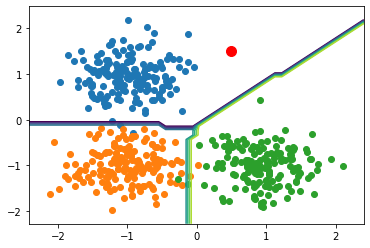

In [26]:
plot_decision_boundary_multiclass(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

xcoor = 0.5
ycoor = 1.5
new_point = np.array([[xcoor,ycoor]])
prediction = model.predict_classes(new_point)
marker_ = "o" if prediction[0]==0 else "x"

plt.plot([xcoor],[ycoor],marker=marker_,markersize = 10, color="red")
plt.show()

# Classifying the MNIST Dataset

In [27]:
np.random.seed(0)

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [29]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [31]:
num_of_samples = []
cols = 5
num_classes = 10

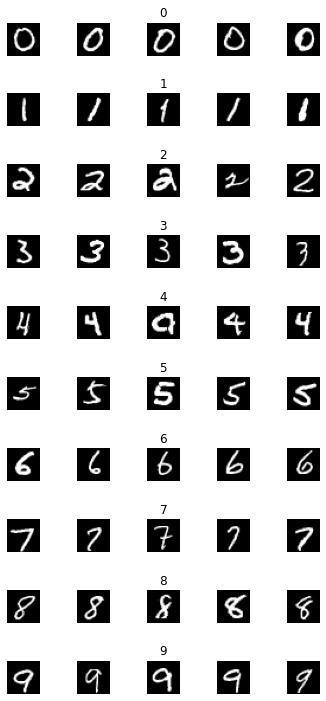

In [32]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols,
                        figsize =(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],
                     cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

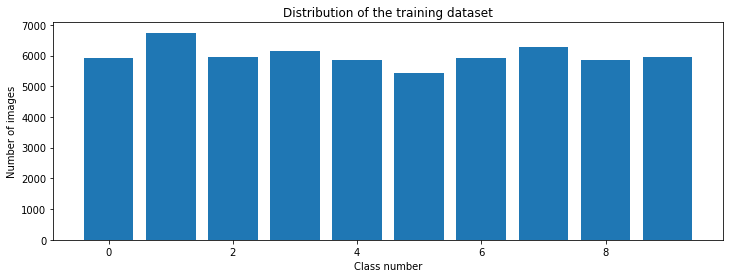

In [33]:
# More or less uniform distribution
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

# MNIST classifier training using Dense NN

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [50]:
X_train = X_train/255
X_test = X_test/255

In [51]:
# flatten the 2D images to single vectors
num_pixels = 28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [52]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_classes, activation = "softmax"))
  model.compile(Adam(learning_rate=0.01), loss="categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [53]:
model = create_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
history = model.fit(X_train, y_train, validation_split=0.1,
          epochs = 10, batch_size = 200, verbose = 1, 
          shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.8428 - accuracy: 0.7279 - val_loss: 0.2710 - val_accuracy: 0.9200
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.9097 - val_loss: 0.2454 - val_accuracy: 0.9278
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.9175 - val_loss: 0.2368 - val_accuracy: 0.9333
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.9222 - val_loss: 0.2430 - val_accuracy: 0.9325
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2686 - accuracy: 0.9224 - val_loss: 0.2287 - val_accuracy: 0.9335
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.9232 - val_loss: 0.2458 - val_accuracy: 0.9295
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.9236 - val_loss: 0.2345 - val_accuracy: 0.9330
Epoch 

Text(0.5, 0, 'epoch')

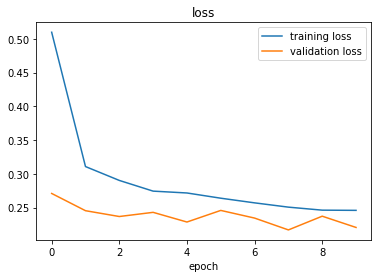

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss","validation loss"])
plt.title("loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

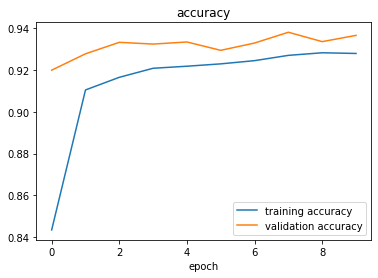

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["training accuracy","validation accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")

In [57]:
# final evaluation on test set
score = model.evaluate(X_test,y_test, verbose=0)
print(type(score))
print("test score", score[0], " Test accuracy ", score[1])

<class 'list'>
test score 0.2606452703475952  Test accuracy  0.9283000230789185


<Response [200]>


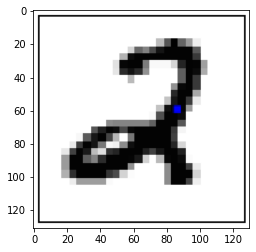

In [58]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url,stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28, 3)


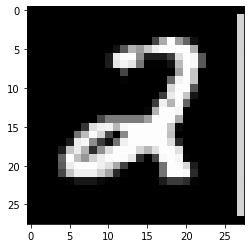

In [59]:
img_array = np.array(img)
resized = cv2.resize(img_array, (28,28))
print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale) # invert
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [60]:
image = image/255
image = image.reshape(1,784)

In [61]:
prediction = model.predict_classes(image)
print("predict digit: ", str(prediction))

predict digit:  [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Convolutional Neural Network

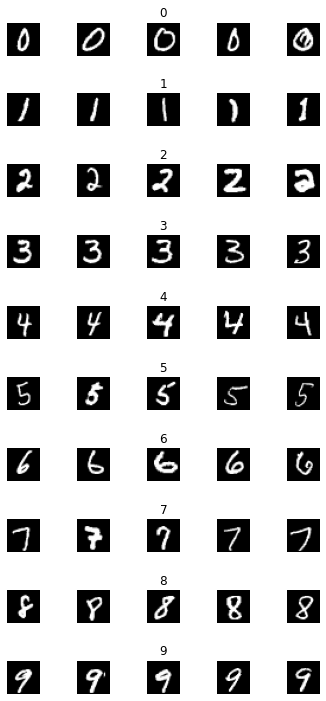

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols,
                        figsize =(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],
                     cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

In [63]:
#gray 2D image, so no RGB depth of kernels.
X_train = X_train.reshape(60000, 28, 28, 1) 
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [64]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(filters=30, kernel_size=(5,5), 
                   input_shape=(28,28,1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=15, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=500, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.01), loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [65]:
model = leNet_model()
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)             

In [66]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_split = 0.1, batch_size=400,
                    verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 6s 7ms/step - loss: 0.6265 - accuracy: 0.7936 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.0474 - val_accuracy: 0.9852
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0456 - val_accuracy: 0.9880
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 

Text(0.5, 0, 'epoch')

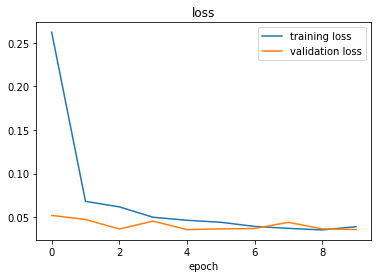

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss","validation loss"])
plt.title("loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

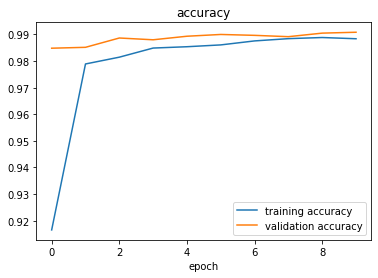

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["training accuracy","validation accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")

<Response [200]>


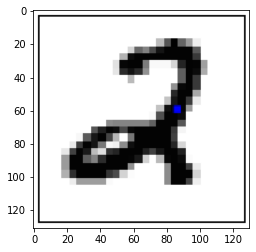

In [69]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url,stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28, 3)


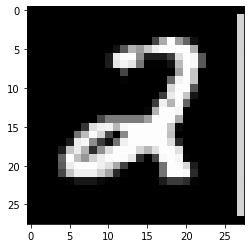

In [70]:
img_array = np.array(img)
resized = cv2.resize(img_array, (28,28))
print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale) # invert
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [71]:
image = image/255
image = image.reshape(1,28,28,1)

In [72]:
prediction = model.predict_classes(image)
print("predict digit: ", str(prediction))

predict digit:  [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [73]:
# final evaluation on test set
score = model.evaluate(X_test,y_test, verbose=0)
print(type(score))
print("test score", score[0], " Test accuracy ", score[1])

<class 'list'>
test score 0.033418554812669754  Test accuracy  0.9901999831199646


# Using Keras.Model

In [74]:
layer1 = Model(inputs= model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs= model.layers[0].input, outputs = model.layers[2].output)

In [75]:
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape, visual_layer2.shape)

(1, 24, 24, 30) (1, 10, 10, 15)


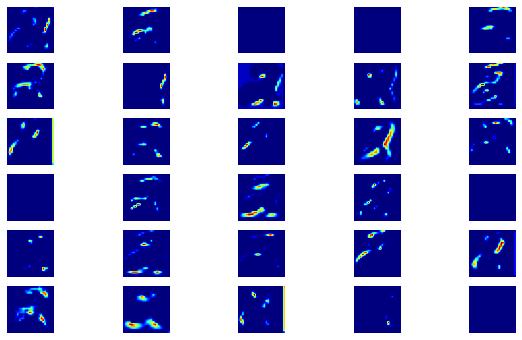

In [76]:
# have a look at the trained kernels
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

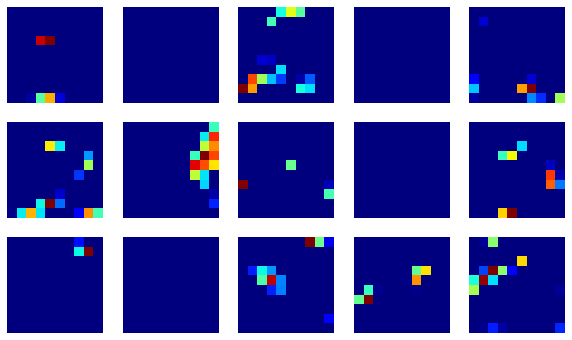

In [77]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

# Traffic sign classification

In [78]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [79]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [80]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

In [81]:
print(train_data.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [82]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val= val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [83]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [84]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


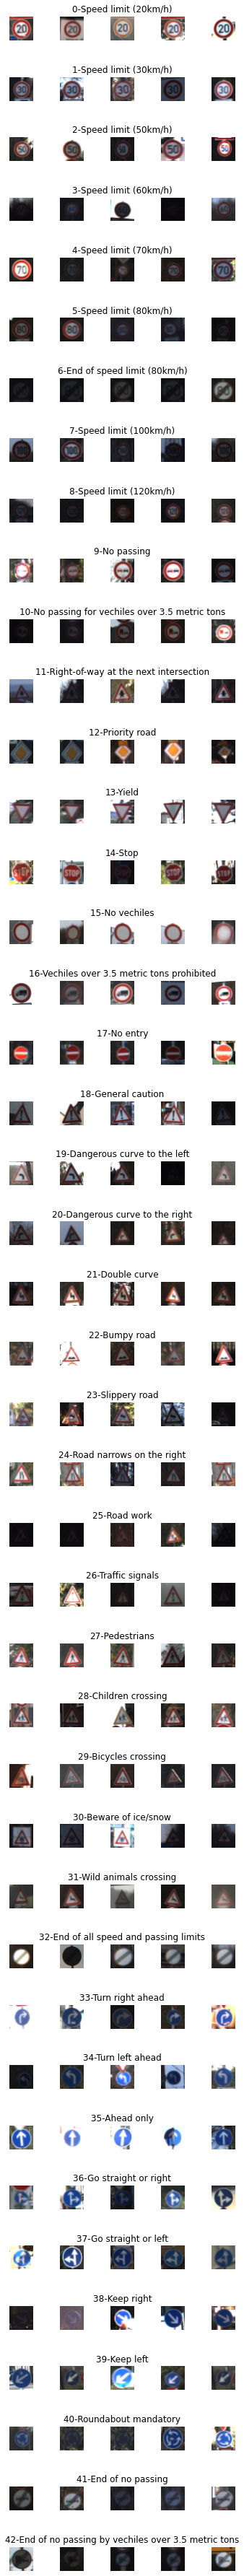

In [85]:
num_of_samples = []
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+'-'+row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

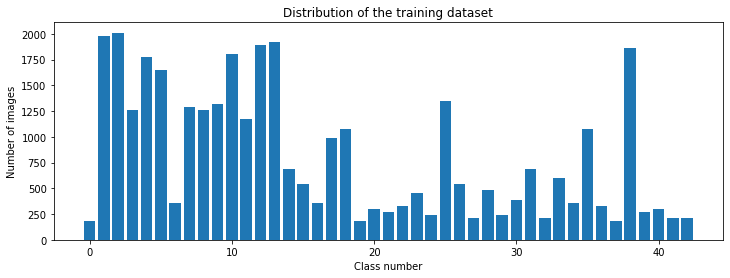

In [86]:
# not as evenly distributed as MNIST!
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3) 36


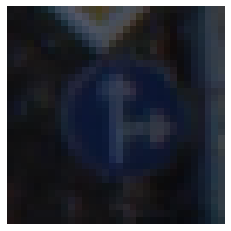

In [87]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape, y_train[1000])

In [88]:
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(-0.5, 31.5, 31.5, -0.5)

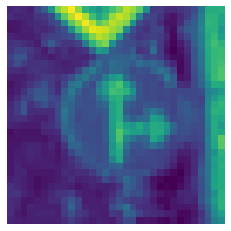

In [89]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")

In [90]:
# histogram equalization
def equalize(img):
  return cv2.equalizeHist(img)

(-0.5, 31.5, 31.5, -0.5)

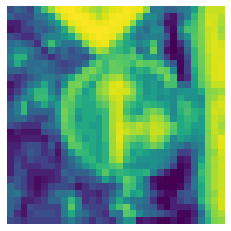

In [91]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")

In [92]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

In [93]:
X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))

In [94]:
X_train.shape

(34799, 32, 32)

In [95]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],
                          X_train.shape[2],1) # adding a depth dimension
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],
                          X_test.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],
                          X_val.shape[2],1)

In [96]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_val = to_categorical(y_val,num_classes)

In [97]:
def leNet_model_trafficsign():
  model = Sequential()

  model.add(Conv2D(filters=60, kernel_size=(5,5), input_shape=(32,32,1), activation="relu"))
  model.add(Conv2D(filters=60, kernel_size=(5,5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=30, kernel_size=(3,3), activation="relu"))
  model.add(Conv2D(filters=30, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.5))

  model.add(Flatten())
  model.add(Dense(units=500, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [98]:
model = leNet_model_trafficsign()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)        

In [99]:
history = model.fit(X_train,y_train, epochs=20,
          validation_data=(X_val,y_val), batch_size = 400,
          verbose=1, shuffle=1
)

Epoch 1/20
87/87 [==============================] - 4s 34ms/step - loss: 3.0788 - accuracy: 0.1834 - val_loss: 0.6611 - val_accuracy: 0.8311
Epoch 2/20
87/87 [==============================] - 2s 26ms/step - loss: 0.8023 - accuracy: 0.7518 - val_loss: 0.2822 - val_accuracy: 0.9102
Epoch 3/20
87/87 [==============================] - 2s 26ms/step - loss: 0.4215 - accuracy: 0.8682 - val_loss: 0.1871 - val_accuracy: 0.9431
Epoch 4/20
87/87 [==============================] - 2s 26ms/step - loss: 0.2896 - accuracy: 0.9095 - val_loss: 0.1420 - val_accuracy: 0.9605
Epoch 5/20
87/87 [==============================] - 2s 26ms/step - loss: 0.2262 - accuracy: 0.9296 - val_loss: 0.1140 - val_accuracy: 0.9669
Epoch 6/20
87/87 [==============================] - 2s 26ms/step - loss: 0.1870 - accuracy: 0.9435 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 7/20
87/87 [==============================] - 2s 26ms/step - loss: 0.1601 - accuracy: 0.9512 - val_loss: 0.0912 - val_accuracy: 0.9744
Epoch 8/20
87

Text(0.5, 0, 'epoch')

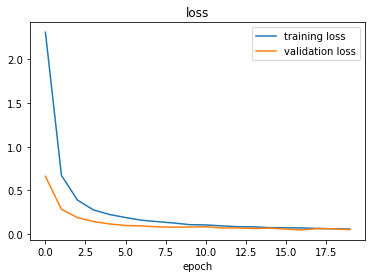

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss","validation loss"])
plt.title("loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

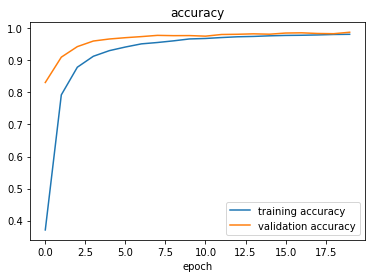

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["training accuracy","validation accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")

In [102]:
# final evaluation on test set
score = model.evaluate(X_test,y_test, verbose=0)
print(type(score))
print("test score", score[0], " Test accuracy ", score[1])

<class 'list'>
test score 0.10932973772287369  Test accuracy  0.969437837600708


# Data augmentation

In [103]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val= val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],
                          X_train.shape[2],1) # adding a depth dimension
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],
                          X_test.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],
                          X_val.shape[2],1)

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_val = to_categorical(y_val,num_classes)

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                   zoom_range=0.2,shear_range=0.1,rotation_range=10)


In [104]:
datagen.fit(X_train) # an iterator
batches = datagen.flow(X_train,y_train, batch_size=20)

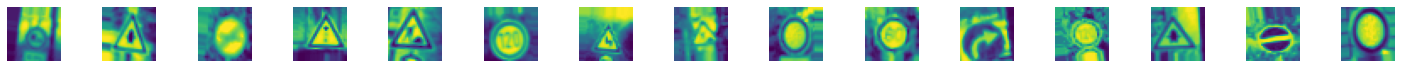

In [105]:
X_batch, y_batch = next(batches) # gets 20 images

fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [109]:
def leNet_model_trafficsign_augmented():
  model = Sequential()

  model.add(Conv2D(filters=60, kernel_size=(5,5), input_shape=(32,32,1), activation="relu"))
  model.add(Conv2D(filters=60, kernel_size=(5,5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=30, kernel_size=(3,3), activation="relu"))
  model.add(Conv2D(filters=30, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=500, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [110]:
model = leNet_model_trafficsign_augmented()

In [111]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=600,
                            epochs=100,
                            validation_data=(X_val, y_val), shuffle = 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
600/600 [==============================] - 11s 17ms/step - loss: 2.8265 - accuracy: 0.2348 - val_loss: 0.4180 - val_accuracy: 0.8846
Epoch 2/100
600/600 [==============================] - 10s 17ms/step - loss: 0.8296 - accuracy: 0.7412 - val_loss: 0.1732 - val_accuracy: 0.9512
Epoch 3/100
600/600 [==============================] - 10s 17ms/step - loss: 0.4823 - accuracy: 0.8498 - val_loss: 0.1483 - val_accuracy: 0.9617
Epoch 4/100
600/600 [==============================] - 10s 17ms/step - loss: 0.3472 - accuracy: 0.8931 - val_loss: 0.1074 - val_accuracy: 0.9637
Epoch 5/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2883 - accuracy: 0.9090 - val_loss: 0.0713 - val_accuracy: 0.9821
Epoch 6/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2298 - accuracy: 0.9264 - val_loss: 0.0620 - val_accuracy: 0.9844
Epoch 7/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2005 - accuracy: 0.9387 - val_loss: 0.0527 - val_ac

Text(0.5, 0, 'epoch')

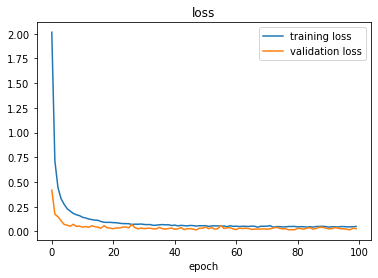

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss","validation loss"])
plt.title("loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

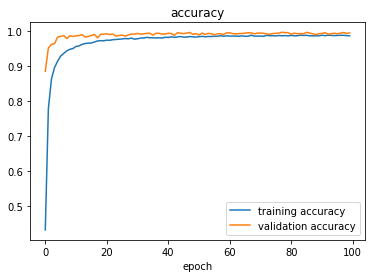

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["training accuracy","validation accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")

In [114]:
# final evaluation on test set
score = model.evaluate(X_test,y_test, verbose=0)
print(type(score))
print("test score", score[0], " Test accuracy ", score[1])

<class 'list'>
test score 0.1028963029384613  Test accuracy  0.979493260383606


# Polynomial regression

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4811
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2306
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2406
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2489
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2255
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2155
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1955
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 13/50
16/16 [==============================

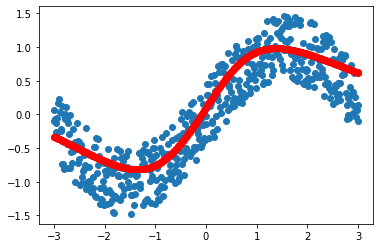

In [116]:
np.random.seed(0)
points = 500
X = np.linspace(-3, 3, points)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, points)
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_dim=1))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1))


adam = Adam(lr=0.01)
model.compile(loss='mse', optimizer=adam)
model.fit(X, y, epochs=50)
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, 'ro')
plt.show()